In [1]:
from scimilarity import CellAnnotation
model_path = "/braid/scimilarity"
ca = CellAnnotation(model_path=model_path)

In [2]:
import scanpy as sc
data_path = "/braid/havivd/scgen/kang.h5ad"
adata = sc.read(data_path)

In [3]:
from scimilarity import align_dataset, lognorm_counts

adata = align_dataset(adata, ca.gene_order)
adata.layers["counts"] = adata.X
adata = lognorm_counts(adata)

In [4]:
adata.obsm["X_scimilarity"] = ca.get_embeddings(adata.X)

In [5]:
sc.pp.neighbors(adata, use_rep="X_scimilarity")
sc.tl.umap(adata)

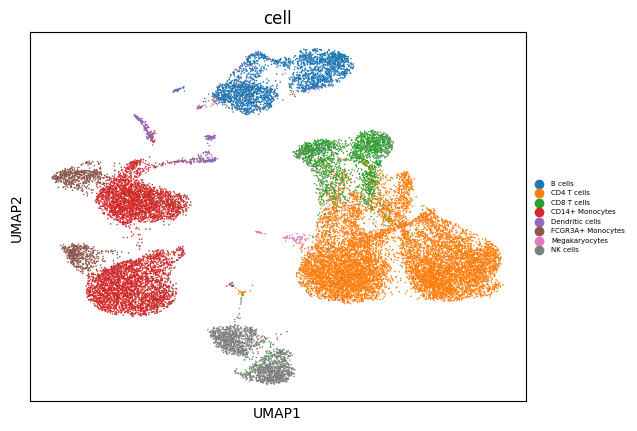

In [6]:
from matplotlib import pyplot as plt

sc.pl.umap(adata, color="cell", legend_fontsize=5)
plt.show()

In [7]:
adata

AnnData object with n_obs × n_vars = 24264 × 28231
    obs: 'tsne1', 'tsne2', 'ind', 'stim', 'cluster', 'cell', 'multiplets', 'n_genes', 'n_counts', 'cell_stim'
    uns: 'orig_genes', 'neighbors', 'umap', 'cell_colors'
    obsm: 'X_tsne', 'concepts', 'X_scimilarity', 'X_umap'
    layers: 'raw', 'counts'
    obsp: 'distances', 'connectivities'

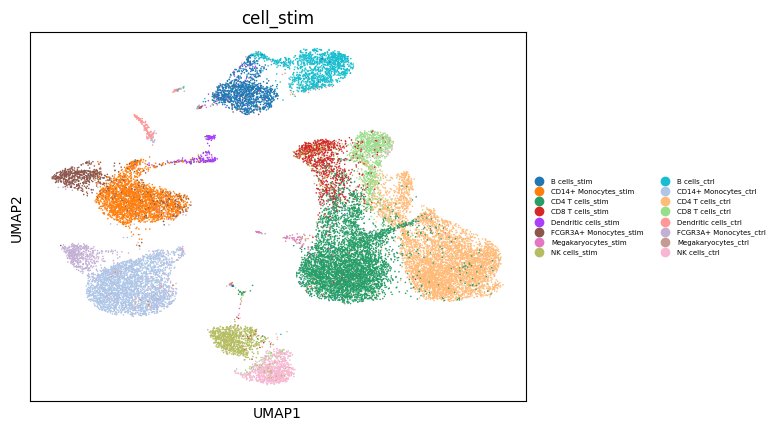

In [8]:
from matplotlib import pyplot as plt

sc.pl.umap(adata, color="cell_stim", legend_fontsize=5)
plt.show()

# Groups:

- Myeloid Cells: CD14+ and FCGR3A+ and Dendritic cells
- T cells: naive CD4 + Treg CD4 + CD8
- B cells:  'memory B cell', 'germinal center B cell'
- NK cells: 

### CD4 T cells

In [12]:
adata_sub = adata[adata.obs["cell"] == "CD4 T cells"].copy()
sc.pp.neighbors(adata_sub, use_rep="X_scimilarity")
sc.tl.umap(adata_sub)

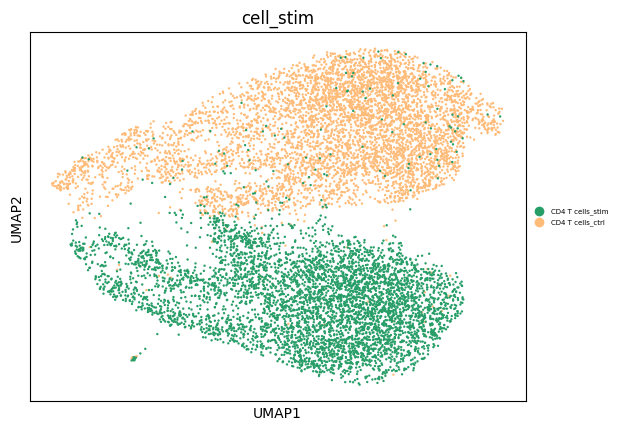

In [13]:
from matplotlib import pyplot as plt

sc.pl.umap(adata_sub, color="cell_stim", legend_fontsize=5)
plt.show()

In [20]:
target_celltypes = [
 'naive thymus-derived CD4-positive, alpha-beta T cell',
   #'central memory CD4-positive, alpha-beta T cell',
#'effector memory CD4-positive, alpha-beta T cell',
    'CD4-positive, CD25-positive, alpha-beta regulatory T cell', 
    #'T-helper 17 cell',
#'T-helper 1 cell',
]

ca.safelist_celltypes(target_celltypes)

In [21]:
adata_sub = ca.annotate_dataset(adata_sub)

Get nearest neighbors finished in: 0.4690437912940979 min


100%|██████████| 10245/10245 [00:02<00:00, 4898.71it/s]


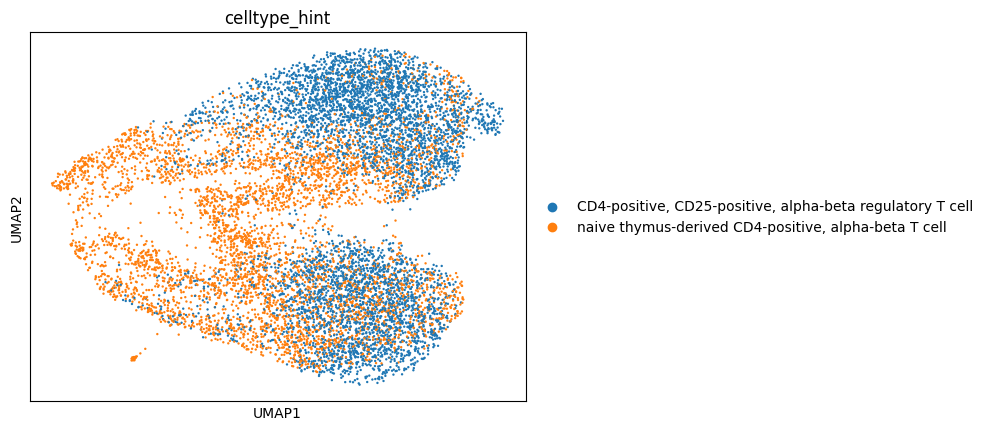

In [22]:
sc.pl.umap(adata_sub, color="celltype_hint", legend_fontsize=10)
plt.show()

In [23]:
adata_cd4_finegrained = adata_sub.copy()

### CD8 T cells

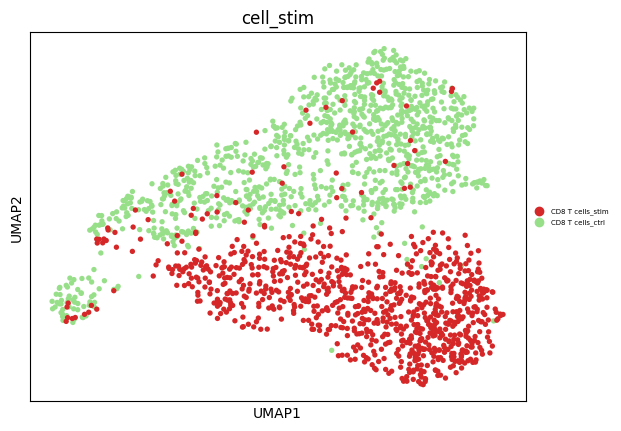

In [41]:
adata_sub = adata[adata.obs["cell"] == "CD8 T cells"].copy()
sc.pp.neighbors(adata_sub, use_rep="X_scimilarity")
sc.tl.umap(adata_sub)

from matplotlib import pyplot as plt

sc.pl.umap(adata_sub, color="cell_stim", legend_fontsize=5)
plt.show()

In [ ]:
target_celltypes = [
 'naive thymus-derived CD8-positive, alpha-beta T cell',
  'central memory CD8-positive, alpha-beta T cell',
  'effector memory CD8-positive, alpha-beta T cell',
  #'effector memory CD8-positive, alpha-beta T cell, terminally differentiated',
'CD8-positive, alpha-beta cytotoxic T cell',
#'mature NK T cell'
]

ca.safelist_celltypes(target_celltypes)

In [43]:
adata_sub = ca.annotate_dataset(adata_sub)

Get nearest neighbors finished in: 0.020002532005310058 min


100%|██████████| 2022/2022 [00:00<00:00, 4681.40it/s]


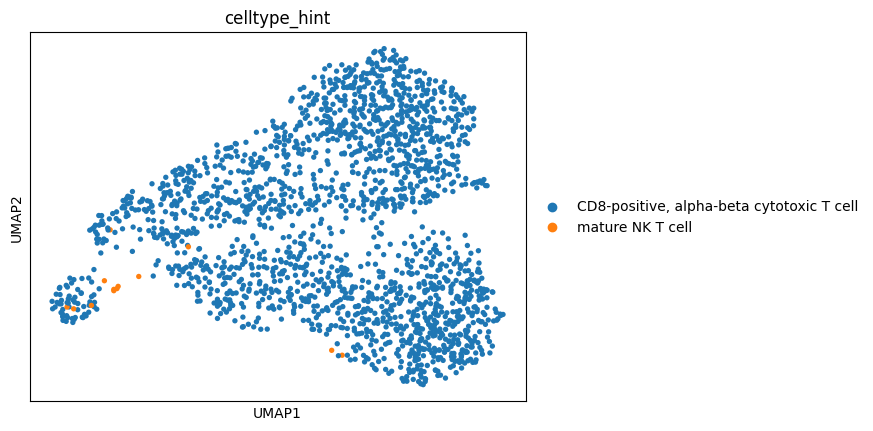

In [44]:
sc.pl.umap(adata_sub, color="celltype_hint", legend_fontsize=10)
plt.show()

In [ ]:
adata_cd8_finegrained = adata_sub.copy()

### B cells

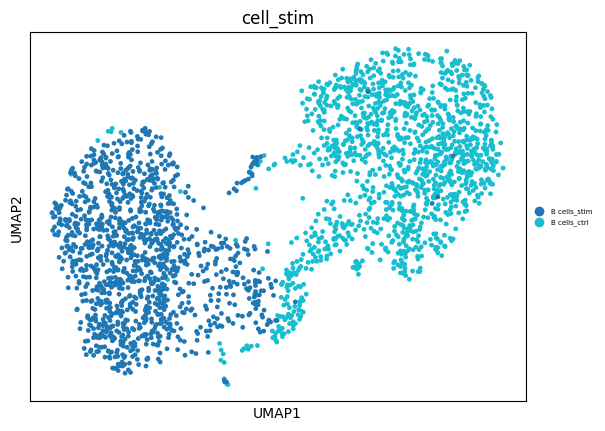

In [29]:
adata_sub = adata[adata.obs["cell"] == "B cells"].copy()
sc.pp.neighbors(adata_sub, use_rep="X_scimilarity")
sc.tl.umap(adata_sub)

from matplotlib import pyplot as plt

sc.pl.umap(adata_sub, color="cell_stim", legend_fontsize=5)
plt.show()

In [33]:
target_celltypes = [
 'memory B cell', 'germinal center B cell'
]

ca.safelist_celltypes(target_celltypes)

In [34]:
adata_sub = ca.annotate_dataset(adata_sub)

Get nearest neighbors finished in: 0.10715132157007853 min


100%|██████████| 2537/2537 [00:00<00:00, 4917.68it/s]


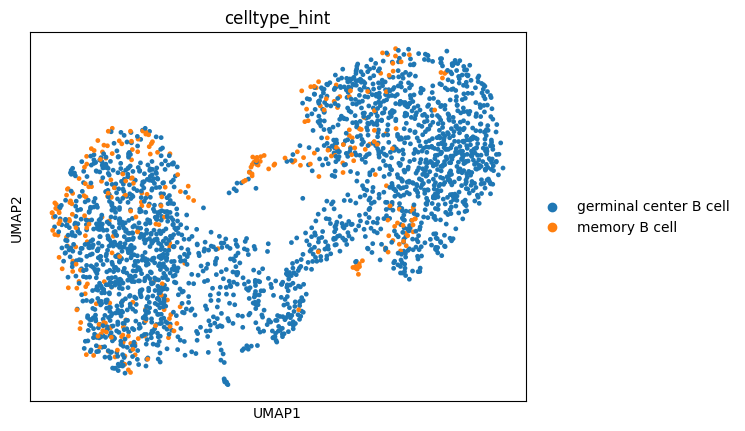

In [35]:
sc.pl.umap(adata_sub, color="celltype_hint", legend_fontsize=10)
plt.show()

In [39]:
adata_bcells_finegrained = adata_sub.copy()

### NK Cells

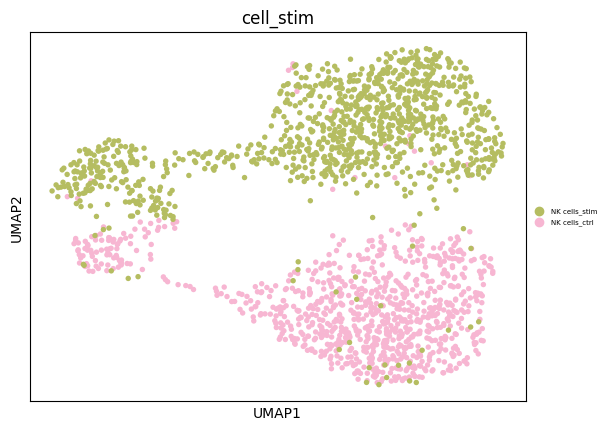

In [46]:
adata_sub = adata[adata.obs["cell"] == "NK cells"].copy()
sc.pp.neighbors(adata_sub, use_rep="X_scimilarity")
sc.tl.umap(adata_sub)

from matplotlib import pyplot as plt

sc.pl.umap(adata_sub, color="cell_stim", legend_fontsize=5)
plt.show()

In [ ]:
target_celltypes = [
'CD16-negative, CD56-bright natural killer cell, human',
'CD16-positive, CD56-dim natural killer cell, human',
'mature NK T cell',

]

ca.safelist_celltypes(target_celltypes)

In [50]:
ca = CellAnnotation(model_path=model_path)

In [51]:
adata_sub = ca.annotate_dataset(adata_sub)

Get nearest neighbors finished in: 0.0010149439175923666 min


100%|██████████| 1962/1962 [00:00<00:00, 4660.63it/s]


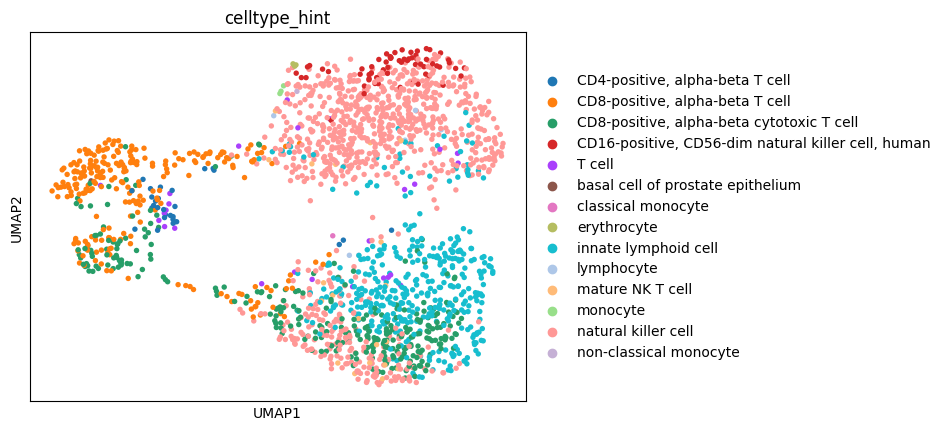

In [52]:
sc.pl.umap(adata_sub, color="celltype_hint", legend_fontsize=10)
plt.show()

In [56]:
target_celltypes = [
'T cell',
"natural killer cell"
]

ca.safelist_celltypes(target_celltypes)

In [57]:
adata_sub = ca.annotate_dataset(adata_sub)

Get nearest neighbors finished in: 0.02195197343826294 min


100%|██████████| 1962/1962 [00:00<00:00, 4754.60it/s]


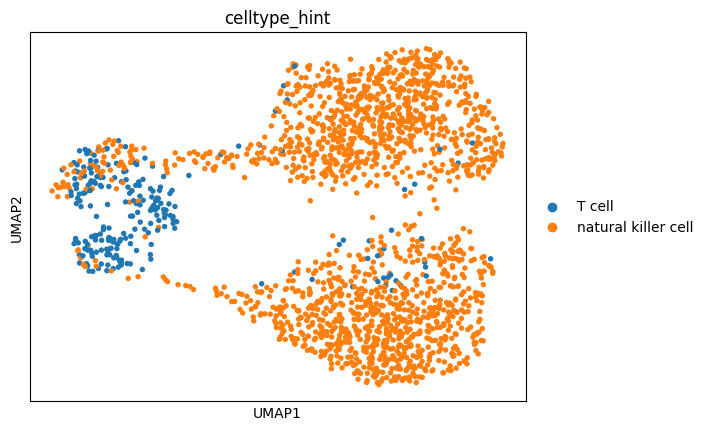

In [58]:
sc.pl.umap(adata_sub, color="celltype_hint", legend_fontsize=10)
plt.show()

In [59]:
adata_sub_sub = adata_sub[adata_sub.obs["celltype_hint"]!="T cell"].copy()

In [63]:
target_celltypes = [
'CD16-negative, CD56-bright natural killer cell, human',
'CD16-positive, CD56-dim natural killer cell, human',
'mature NK T cell',
'innate lymphoid cell',
'natural killer cell'
]

ca.safelist_celltypes(target_celltypes)

In [64]:
adata_sub_sub = ca.annotate_dataset(adata_sub_sub)

Get nearest neighbors finished in: 0.0048945943514506025 min


100%|██████████| 1729/1729 [00:00<00:00, 4814.61it/s]


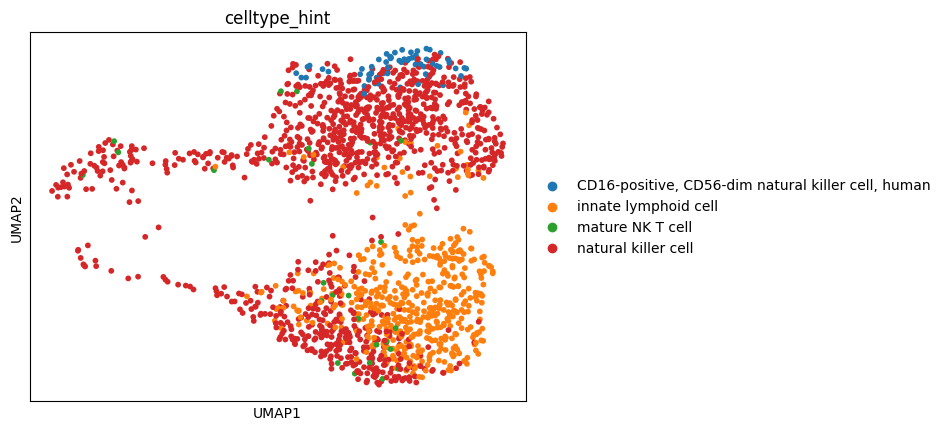

In [65]:
sc.pl.umap(adata_sub_sub, color="celltype_hint", legend_fontsize=10)
plt.show()

In [66]:
adata_nk_finegrained = adata_sub_sub.copy()

### Putting everything together

In [68]:
adata.obs["cell"].unique()

['CD14+ Monocytes', 'CD4 T cells', 'Dendritic cells', 'NK cells', 'CD8 T cells', 'B cells', 'Megakaryocytes', 'FCGR3A+ Monocytes']
Categories (8, object): ['B cells', 'CD4 T cells', 'CD8 T cells', 'CD14+ Monocytes', 'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes', 'NK cells']

In [69]:
import anndata as ad 

In [81]:
# T cells
adata_cd4_finegrained.obs["L2"] = adata_cd4_finegrained.obs["celltype_hint"]
adata_cd4_finegrained.obs["L1"] = "T cell"

adata_cd8_finegrained = adata[adata.obs["cell"]== "CD8 T cells"]
adata_cd8_finegrained.obs["L2"] = "CD8 T cells"
adata_cd8_finegrained.obs["L1"] = "T cell"

adata_t_cells = ad.concat([adata_cd4_finegrained, adata_cd8_finegrained])

# Myeloid cells
adata_myeloid = adata[adata.obs["cell"].isin(['FCGR3A+ Monocytes','CD14+ Monocytes','Dendritic cells'])].copy()
adata_myeloid.obs["L1"] = "Myeloid cell"
adata_myeloid.obs["L2"] = adata_myeloid.obs["cell"]

# B cells
adata_bcells_finegrained.obs["L1"] = "B cell"
adata_bcells_finegrained.obs["L2"] = adata_bcells_finegrained.obs["celltype_hint"]

# NK cells
adata_nk_finegrained.obs["L1"] = "NK cell"
adata_nk_finegrained.obs["L2"] = "NK cell"


adata_merged = ad.concat([adata_t_cells, adata_myeloid, adata_bcells_finegrained, adata_nk_finegrained])

/tmp/ipykernel_1547904/1935940752.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cd8_finegrained.obs["L2"] = "CD8 T cells"


In [82]:
adata_merged.obs["L1_stim"] = adata_merged.obs["L1"].astype(str) + "_" + adata_merged.obs["stim"].astype(str)
adata_merged.obs["L2_stim"] = adata_merged.obs["L2"].astype(str) + "_" + adata_merged.obs["stim"].astype(str)

In [83]:
adata_merged.write_h5ad("./kang_scimilarity_v2.h5ad")

In [74]:
adata.shape

(24264, 28231)

### Generate the concepts

In [4]:
import anndata as ad
import pandas as pd
import numpy as np
adata = ad.read_h5ad('/braid/havivd/scgen/kang_scimilarity_v2.h5ad')

In [10]:
adata.obsm["concepts"] = pd.get_dummies(adata.obs[['L1', 'stim']]).astype(np.float32)
adata.obsm["concepts"].columns = [col.replace('stim_', '') for col in adata.obsm['concepts'].columns]
adata.obsm["concepts"] = adata.obsm["concepts"].drop('ctrl', axis = 1)

In [11]:
adata.obsm["concepts"]

,L1_B cell,L1_Myeloid cell,L1_NK cell,L1_T cell,stim
AAACATACCATGCA-1,0.0,0.0,0.0,1.0,0.0
AAACATACGATGAA-1,0.0,0.0,0.0,1.0,0.0
AAACATACGCTTCC-1,0.0,0.0,0.0,1.0,0.0
AAACATACGTTGTG-1,0.0,0.0,0.0,1.0,0.0
AAACATACTGCGTA-1,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
TTTCACGAACTGTG-1,0.0,0.0,1.0,0.0,1.0
TTTCAGTGACGCAT-1,0.0,0.0,1.0,0.0,1.0
TTTCAGTGCGAGAG-1,0.0,0.0,1.0,0.0,1.0
TTTCAGTGTCCGTC-1,0.0,0.0,1.0,0.0,1.0


In [13]:
adata.write_h5ad("./kang_scimilarity_v2_with_concepts.h5ad")

# WIP stuff

In [14]:
adata.obs["L2_stim"]

AAACATACCATGCA-1    naive thymus-derived CD4-positive, alpha-beta ...
AAACATACGATGAA-1    CD4-positive, CD25-positive, alpha-beta regula...
AAACATACGCTTCC-1    CD4-positive, CD25-positive, alpha-beta regula...
AAACATACGTTGTG-1    CD4-positive, CD25-positive, alpha-beta regula...
AAACATACTGCGTA-1    naive thymus-derived CD4-positive, alpha-beta ...
                                          ...                        
TTTCACGAACTGTG-1                                         NK cell_stim
TTTCAGTGACGCAT-1                                         NK cell_stim
TTTCAGTGCGAGAG-1                                         NK cell_stim
TTTCAGTGTCCGTC-1                                         NK cell_stim
TTTCCAGAGTCGAT-1                                         NK cell_stim
Name: L2_stim, Length: 23821, dtype: category
Categories (18, object): ['CD4-positive, CD25-positive, alpha-beta regul..., 'CD4-positive, CD25-positive, alpha-beta regul..., 'CD8 T cells_ctrl', 'CD8 T cells_stim', ..., 'memory B c

In [38]:
og_adata = sc.read("/braid/havivd/scgen/kang/kang_scimilarity.h5ad")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/braid/havivd/scgen/kang/kang_scimilarity.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [20]:
predictions, nn_idxs, nn_dists, nn_stats = ca.get_predictions_kNN(adata.obsm["X_scimilarity"], weighting=True)
adata.obs["predictions_unconstrained"] = predictions.values

Get nearest neighbors finished in: 0.011906091372172039 min


100%|██████████| 24264/24264 [00:05<00:00, 4648.80it/s]


In [24]:
len(predictions.unique())

48

In [22]:
adata.write_h5ad("./kang_scimilarity.h5ad")

In [25]:
print("\n".join(ca.classes))


intestinal crypt stem cell
T follicular helper cell
vascular associated smooth muscle cell
fibroblast of lung
type II pneumocyte
alveolar macrophage
neuroendocrine cell
pancreatic acinar cell
intermediate monocyte
inflammatory macrophage
kidney collecting duct principal cell
CD4-positive, alpha-beta memory T cell
enterocyte
neural crest cell
oligodendrocyte
duct epithelial cell
Mueller cell
luminal epithelial cell of mammary gland
memory B cell
tracheal goblet cell
CD8-positive, alpha-beta T cell
naive B cell
lung neuroendocrine cell
neuron
megakaryocyte
mesenchymal stem cell
pro-B cell
central memory CD8-positive, alpha-beta T cell
periportal region hepatocyte
kidney proximal convoluted tubule epithelial cell
CD14-positive monocyte
effector CD8-positive, alpha-beta T cell
group 3 innate lymphoid cell
animal cell
endothelial cell of artery
effector memory CD8-positive, alpha-beta T cell, terminally differentiated
retina horizontal cell
mesodermal cell
enteric smooth muscle cell
CD16-ne

In [27]:
target_celltypes = [
    'naive B cell', 'memory B cell', 'germinal center B cell', 'plasmablast', 'plasma cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'central memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'T follicular helper cell', 'CD4-positive, CD25-positive, alpha-beta regulatory T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'central memory CD8-positive, alpha-beta T cell', 'effector memory CD8-positive, alpha-beta T cell', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'classical monocyte', 'intermediate monocyte', 'non-classical monocyte', 'plasmacytoid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'CD141-positive myeloid dendritic cell', 'Langerhans cell', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'mature NK T cell', 'megakaryocyte', 'platelet'
]

ca.safelist_celltypes(target_celltypes)

In [26]:
adata

AnnData object with n_obs × n_vars = 24264 × 28231
    obs: 'tsne1', 'tsne2', 'ind', 'stim', 'cluster', 'cell', 'multiplets', 'n_genes', 'n_counts', 'cell_stim', 'predictions_unconstrained'
    uns: 'orig_genes', 'neighbors', 'umap', 'cell_colors'
    obsm: 'X_tsne', 'concepts', 'X_scimilarity', 'X_umap'
    layers: 'raw', 'counts'
    obsp: 'distances', 'connectivities'

In [28]:
adata = ca.annotate_dataset(adata)

Get nearest neighbors finished in: 0.628611667950948 min


100%|██████████| 24264/24264 [00:05<00:00, 4748.48it/s]


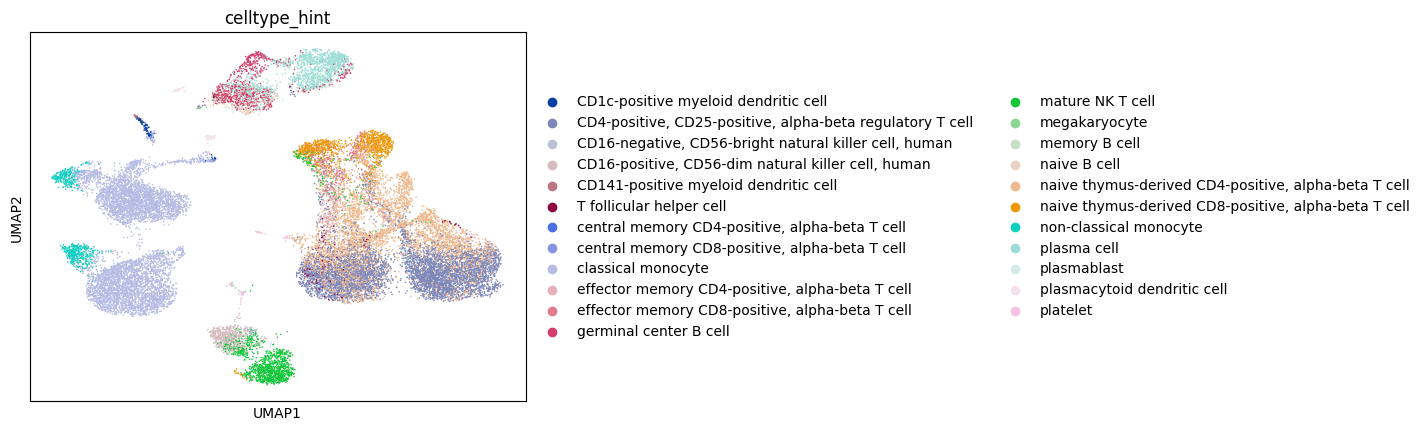

In [29]:
sc.pl.umap(adata, color="celltype_hint", legend_fontsize=10)
plt.show()

In [30]:
adata.write_h5ad("./kang_scimilarity.h5ad")

In [3]:
import anndata as ad
import pandas as pd
import numpy as np
adata = ad.read_h5ad('/braid/havivd/scgen/kang_scimilarity_v2_with_concepts.h5ad')
adata.obs["L2_stim"].unique().tolist()

['naive thymus-derived CD4-positive, alpha-beta T cell_ctrl',
 'CD4-positive, CD25-positive, alpha-beta regulatory T cell_ctrl',
 'naive thymus-derived CD4-positive, alpha-beta T cell_stim',
 'CD4-positive, CD25-positive, alpha-beta regulatory T cell_stim',
 'CD8 T cells_ctrl',
 'CD8 T cells_stim',
 'CD14+ Monocytes_ctrl',
 'Dendritic cells_ctrl',
 'FCGR3A+ Monocytes_ctrl',
 'Dendritic cells_stim',
 'CD14+ Monocytes_stim',
 'FCGR3A+ Monocytes_stim',
 'germinal center B cell_ctrl',
 'memory B cell_ctrl',
 'memory B cell_stim',
 'germinal center B cell_stim',
 'NK cell_ctrl',
 'NK cell_stim']